In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airline.dropna(axis=0,inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

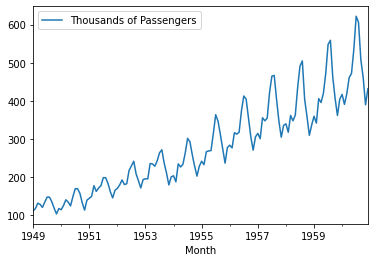

In [13]:
# This is Seasonal Graph
df_airline.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060528
p- value: 0.9918802434376411
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### In order to make it as stationary we have to do Differencing

In [17]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [18]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.829266824169999
p- value: 0.05421329028382552
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [21]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [22]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.38423154246854
p- value: 2.7328918500140445e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [23]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [24]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [25]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [26]:
# For Sesanal sometime ARIMA will not work well and SARMIAX works well 

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

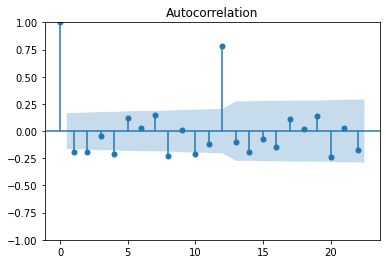

In [28]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())


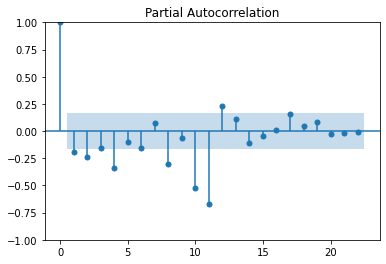

In [29]:
acf = plot_pacf(df_airline["Passengers Second Difference"].dropna())

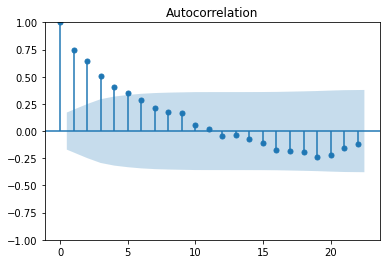

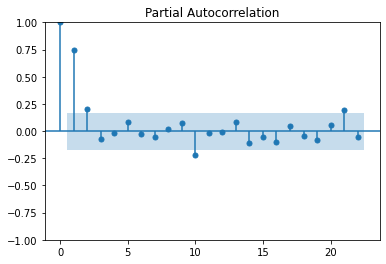

In [30]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

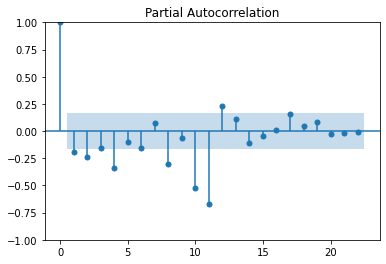

In [31]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

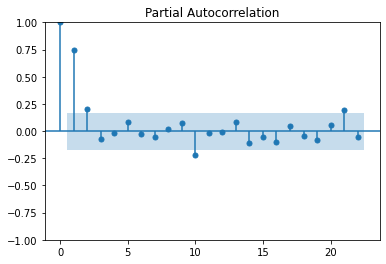

In [32]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [33]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [34]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [35]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [36]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [37]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [38]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [39]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [42]:
# model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,12))#(p,d,q)
model_ARIMA = sm.tsa.arima.ARIMA(train_data['Thousands of Passengers'], order=(10,2,0))
# order=(10,2,0) = (p,d,q)

/home/pradeep.k@zucisystems.com/workspace_working_Repo/ML/envname/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/pradeep.k@zucisystems.com/workspace_working_Repo/ML/envname/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/pradeep.k@zucisystems.com/workspace_working_Repo/ML/envname/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
model_Arima_fit=model_ARIMA.fit()

In [67]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Tue, 19 Dec 2023   AIC                            736.477
Time:                             16:47:54   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
#Note 
# p-value is less than 0.05 
# All the varialble is less than 0.05 are good impact on the current time stamp

In [69]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [70]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [71]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [72]:
pred

1956-01-01    300.183612
1956-02-01    309.478355
1956-03-01    316.443016
1956-04-01    307.827546
1956-05-01    318.544235
1956-06-01    348.922085
1956-07-01    366.020289
1956-08-01    346.567536
1956-09-01    332.120971
1956-10-01    307.734757
1956-11-01    311.623913
1956-12-01    339.828198
1957-01-01    349.840407
1957-02-01    356.098237
1957-03-01    350.687832
1957-04-01    350.080468
1957-05-01    361.157698
1957-06-01    381.216520
1957-07-01    382.319378
1957-08-01    372.852584
1957-09-01    364.110101
1957-10-01    356.108929
1957-11-01    371.293794
1957-12-01    385.323600
1958-01-01    392.077843
1958-02-01    391.405857
1958-03-01    388.404587
1958-04-01    391.572864
1958-05-01    402.448087
1958-06-01    413.255691
1958-07-01    410.853422
1958-08-01    407.670551
1958-09-01    402.486343
1958-10-01    406.089155
1958-11-01    418.125321
1958-12-01    426.012383
1959-01-01    429.205589
1959-02-01    427.352241
1959-03-01    428.150998
1959-04-01    432.790857


In [73]:
residuals

Month
1956-01-01    -16.183612
1956-02-01    -32.478355
1956-03-01      0.556984
1956-04-01      5.172454
1956-05-01     -0.544235
1956-06-01     25.077915
1956-07-01     46.979711
1956-08-01     58.432464
1956-09-01     22.879029
1956-10-01     -1.734757
1956-11-01    -40.623913
1956-12-01    -33.828198
1957-01-01    -34.840407
1957-02-01    -55.098237
1957-03-01      5.312168
1957-04-01     -2.080468
1957-05-01     -6.157698
1957-06-01     40.783480
1957-07-01     82.680622
1957-08-01     94.147416
1957-09-01     39.889899
1957-10-01     -9.108929
1957-11-01    -66.293794
1957-12-01    -49.323600
1958-01-01    -52.077843
1958-02-01    -73.405857
1958-03-01    -26.404587
1958-04-01    -43.572864
1958-05-01    -39.448087
1958-06-01     21.744309
1958-07-01     80.146578
1958-08-01     97.329449
1958-09-01      1.513657
1958-10-01    -47.089155
1958-11-01   -108.125321
1958-12-01    -89.012383
1959-01-01    -69.205589
1959-02-01    -85.352241
1959-03-01    -22.150998
1959-04-01    -36.7

<AxesSubplot:ylabel='Density'>

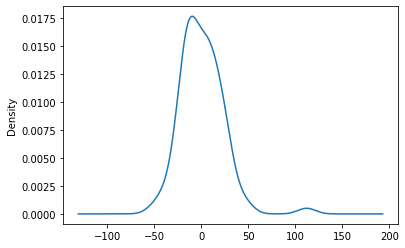

In [74]:
model_Arima_fit.resid.plot(kind='kde')

In [75]:
# Here we have proper Normal distribution in model 
# This is good model

In [76]:
test_data['Predicted_ARIMA']=pred

/tmp/ipykernel_98624/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

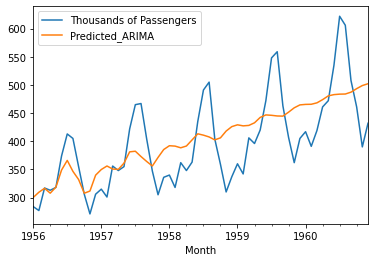

In [78]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

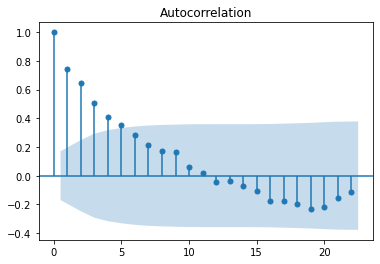

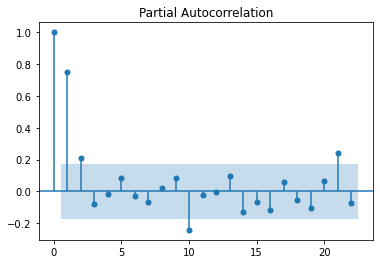

In [119]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

### SARIMA model
#### Sesonal ARIMAX

In [86]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [87]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/home/pradeep.k@zucisystems.com/workspace_working_Repo/ML/envname/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/pradeep.k@zucisystems.com/workspace_working_Repo/ML/envname/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [88]:
model_SARIMA_fit=model_SARIMA.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18261D+00    |proj g|=  4.32163D-02

At iterate    5    f=  3.17613D+00    |proj g|=  3.18802D-02

At iterate   10    f=  3.17248D+00    |proj g|=  2.87532D-03

At iterate   15    f=  3.16990D+00    |proj g|=  1.51292D-02

At iterate   20    f=  3.16245D+00    |proj g|=  1.30061D-02


 This problem is unconstrained.



At iterate   25    f=  3.15869D+00    |proj g|=  3.73366D-03

At iterate   30    f=  3.15804D+00    |proj g|=  2.75483D-03

At iterate   35    f=  3.15800D+00    |proj g|=  5.64855D-04

At iterate   40    f=  3.15797D+00    |proj g|=  4.54392D-03

At iterate   45    f=  3.15778D+00    |proj g|=  6.28454D-03

At iterate   50    f=  3.15762D+00    |proj g|=  1.38082D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   1.381D-03   3.158D+00
  F =   3.1576240759039611     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/pradeep.k@zucisystems.com/workspace_working_Repo/ML/envname/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [89]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Tue, 19 Dec 2023   AIC                            548.481
Time:                                     17:01:19   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5984      0.938      0.638      0.523      -1.239       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4527      0.894     -0.506      0.613      -2.205       1.299
ma.L1          0.1836      1.164      0.158      0.875      -2.098       2.466
ma.L2         -0.5343      1.262     -0.423      0.672      -3.008       1.939
ma.L3         -0.0986      0.384     -0.257      0.797      -0.852       0.654
ma.L4         -0.1272      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7316     81.116      1.082      0.279     -71.253     246.716
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,483.883995
1960-09-01,508.0,-98.0,-82.0,45.0,487.184118
1960-10-01,461.0,-47.0,51.0,54.0,493.432799
1960-11-01,390.0,-71.0,-24.0,28.0,498.930088
1960-12-01,432.0,42.0,113.0,27.0,502.159841


In [91]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [92]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<AxesSubplot:xlabel='Month'>

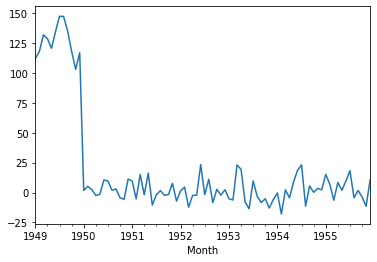

In [93]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

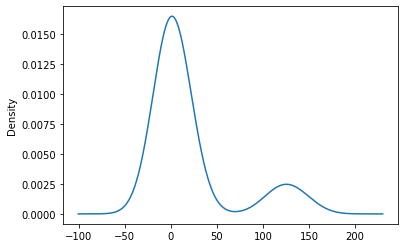

In [94]:
model_SARIMA_fit.resid.plot(kind='kde')

In [95]:
test_data['Predicted_SARIMA']=pred_Sarima

/tmp/ipykernel_98624/1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [96]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183612,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,309.478355,NaN
1956-03-01,317.0,40.0,47.0,50.0,316.443016,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,307.827546,NaN
1956-05-01,318.0,5.0,9.0,48.0,318.544235,NaN
1956-06-01,374.0,56.0,51.0,59.0,348.922085,NaN
1956-07-01,413.0,39.0,-17.0,49.0,366.020289,403.397781
1956-08-01,405.0,-8.0,-47.0,58.0,346.567536,385.071008
1956-09-01,355.0,-50.0,-42.0,43.0,332.120971,349.445037


<AxesSubplot:xlabel='Month'>

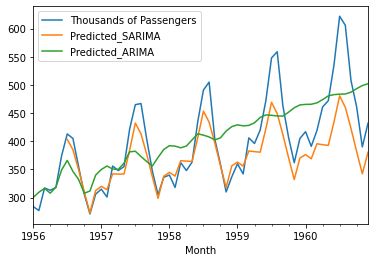

In [97]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()